# How to install Climate Data Operator (CDO)
**Plus some basic examples using operators!**

<p style="font-size:16px">
    These instructions will go over how to install CDO on Mac OS.
    Before we continue, I assume you have installed pygrib and netCDF on your machine. These two are needed to read and write GRIB and NetCDF datasets, the two file formats of climate and forecast model data.
    If you haven't yet, please refer to <a href="https://github.com/jswhit/pygrib">here for pygrib</a> and <a href="https://github.com/Unidata/netcdf4-python">here for netCDF</a>. I personally used Macports to install these two.
</p>
    

## Overview
<ul style="padding-left:50px;font-size:20px">
    <li> Option 1: Install CDO with homebrew to use through terminal directory. </li>
    <li> Option 2: Install python-CDO with conda to use CDO operations through python. </li>
    <li>Introduce example operations to perform on grib/netCDF files using CDO</li>
</ul>
<br>

### Using CDO works with both option 1 and 2. However, there is a slight difference in syntax between the two. I will be using python-cdo, so if you go with the oher option, look up the appropriate syntax to use the same operator.

## Option 1: CDO directly through terminal using homebrew
### If you already have homebrew, skip to step 5
<ol style="padding-left:50px;font-size:16px">
    <li>Open up your terminal and run the following:</li>
    xcode-select --install
    <img src="images/xcode.jpg" width="800" height="600">
    <li>After getting xcode command line tool type the following:</li>
    ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
    <img src="images/brew.jpg" width="800" height="600">
    <li>You will be prompted to enter your password and press return to confirm. The download will run.</li>
    <img src="images/success.jpg" width="800" height="600">
    <li>Congrats! You have now successfully installed homebrew.</li>
    <br>
    <li>Download the latest version of CDO <a href="https://code.mpimet.mpg.de/projects/cdo/files">here.</a> </li>
    <img src="images/CDOpage.jpg"  width="600" height="400"> 
    <br>
    <li>After the zip package is in your downloads, double click to unzip. A folder like cdo-X.Y.Z should be in your downloads folder now.</li>
    <img src="images/CDOfolder.jpg" width="600" height="400"> 
    <br>
    <li> Open up your terminal, move the cdo folder into a directory you want to work in.</li>
    <img src="images/move.png" width="600" height="400"> 
    <br>
    <li> If you already have eccodes, skip to the next step </li>
    Do "brew install eccodes" in terminal. 
    <br>
    When we run the configure script, we want to configure with eccodes. Having eccodes will allow us to work with GRIB datasets as well as netCDF datasets. 
    <br><br>
    <li>Configure CDO with eccodes:</li>
    ./configure --with-eccodes
     <img src="images/configure.png" width="600" height="400"> 
    <br><br>
    <li>Make and make install. It will take a few minutes. </li>  
    <img src="images/make.png" width="600" height="400"> 
    <br><br>
    <li>Nice, you now have CDO with eccodes. Can do operations on GRIB and netCDF files directly though the terminal! </li>
</ol>
<br><br>


## Option 2: Install python-CDO through python with conda to use as a native Library
### If you already have conda, skip to step 2
<ol style="padding-left:50px;font-size:16px">
    <li> Download the latest version of conda  <a href="https://docs.conda.io/en/latest/miniconda.html">here.</a></li>
    <img src="images/conda.png" width="600" height="400">
    <br>
    <li> After installing conda, type the following in terminal: </li>
    conda install -c conda-forge python-cdo
    <br><br>
    <li> Now do "pip install cdo" </li>
    <br>
    <li>Now you are able to use climate data operators like it is a python library!</li>
    <img src="images/pythoncdo.png" width="600" height="400">
</ol>
<br><br>


## Introduce example operations to perform on grib/netCDF files using CDO

We need to work with a GRIB or netCDF dataset. <a href="data">This</a> is the one I will be using for the examples. You can use the same or another dataset. For these examples, I will be performing the code using jupyter notebooks. I will be using python-cdo, so its syntax may be a little different than CDO through terminal.

### Familiarize yourself with the data
**1. First, let us import the libraries we need. Then set our infile variable and cdo object.**

In [1]:
from cdo import Cdo

cdo = Cdo()
infile = 'data/flux.grb'

**2. Now, run the cell and let us see what variables are stores in this multidimensional array**

In [2]:
cdo.showname(input=infile)

['prate sp tmax tmin']

So for our variables we have precipitation rate, surface pressure, temperature max, and temperature min.

**3. With info we can see minimum, maximum, averages and any missing values.**

In [3]:
cdo.info(input=infile)

['-1 :       Date     Time   Level Gridsize    Miss :     Minimum        Mean     Maximum : Parameter ID',
 '1 : 2004-03-05 12:00:00       0    18048       0 :      0.0000  3.0178e-05   0.0013390 : 7.1.0',
 '2 : 2004-03-05 12:00:00       0    18048       0 :      49650.      96731.  1.0933e+05 : 0.3.0',
 '3 : 2004-03-05 12:00:00       2    18048       0 :      223.70      277.82      319.90 : 4.0.0',
 '4 : 2004-03-05 12:00:00       2    18048       0 :      216.00      275.16      303.80 : 5.0.0']

**4. With show attributes, we are able to see more information on the variables such as name, unit, and how many missing values. Missing values looks like a weird exponent, but it rounds to zero.**

In [4]:
cdo.showatts(input=infile)

['prate:',
 'long_name = "Precipitation rate"',
 'units = "kg m**-2 s**-1"',
 'missing_value = "-9.000000e+33"',
 'sp:',
 'standard_name = "surface_air_pressure"',
 'long_name = "Surface pressure"',
 'units = "Pa"',
 'missing_value = "-9.000000e+33"',
 'tmax:',
 'long_name = "Maximum temperature"',
 'units = "K"',
 'missing_value = "-9.000000e+33"',
 'tmin:',
 'long_name = "Minimum temperature"',
 'units = "K"',
 'missing_value = "-9.000000e+33"',
 'Global:']

**5. Let us import some things to visualize the data we just worked with. If you don't have the necessary packages, just do "pip install package" or "pip3 install package" depending if you are using python 2 or 3.** 
<br>
**Note:** This is to visualize the pygrib files in python. If you want to visualize netCDF files click <a href="https://joehamman.com/2013/10/12/plotting-netCDF-data-with-Python/">here.</a> Or, you can visualize this data using <a href="https://www.giss.nasa.gov/tools/panoply/">Panoply.</a>

In [5]:
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np

<ipython-input-6-0b928f706620>:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.gist_stern_r)


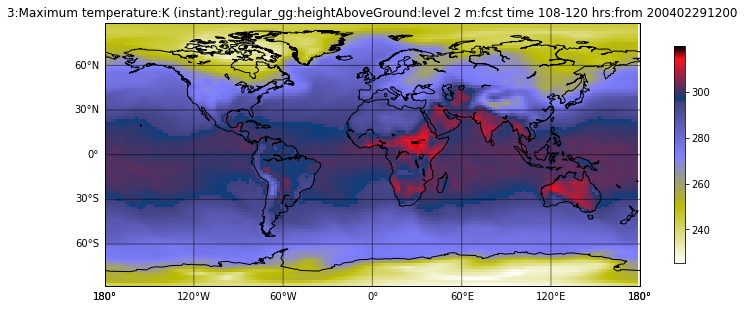

In [6]:
plt.figure(figsize=(12,8))

file = 'data/flux.grb'
grbs = pygrib.open(file)
# selects the variable at index 2, Max Temperature
grb = grbs.select()[2]
# Play around with the index to see the different plots
# index 0 -> Precipitation rate
# index 1 -> Surface Pressure
# index 2 -> Maximum temperature
# index 3 -> Minimum temperature
data = grb.values

lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )
lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )
data, lons = shiftgrid(180., data, lons, start=False)
grid_lon, grid_lat = np.meshgrid(lons, lats) #regularly spaced 2D grid
 
m = Basemap(projection='cyl', llcrnrlon=-180, \
    urcrnrlon=180.,llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')
 
x, y = m(grid_lon, grid_lat)
 
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.gist_stern_r)
 
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
 
plt.colorbar(cs,orientation='vertical', shrink=0.5)
plt.title(grb) # Set the name of the variable to plot
plt.savefig(infile+'.png') # Set the output file name

**Great, now you have the packages install to use CDO. Furthemore, there is a manual of <a href="https://code.mpimet.mpg.de/projects/cdo/embedded/cdo.pdf">CDO operators</a>.**